In [40]:
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [11]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [39]:
#split into train and test
#in range 0-1
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [14]:
#classes 0-9
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

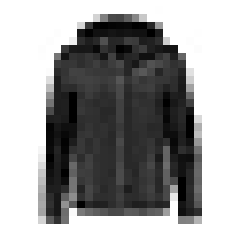

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))#300 neurons
model.add(keras.layers.Dense(100, activation="relu"))#100 neurons
model.add(keras.layers.Dense(10, activation="softmax"))#10 output classes
#softmax as output is a probability and has to be 0-1 and sum adds to 1

#equivalent to the following
model=keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300,activation='relu'),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))#validation data used for validation at each step of gradient descent

Epoch 1/30
1719/1719 [==============================] - 2s 819us/step - loss: 0.7195 - accuracy: 0.7599 - val_loss: 0.5348 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.4903 - accuracy: 0.8296 - val_loss: 0.4519 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 1s 760us/step - loss: 0.4458 - accuracy: 0.8444 - val_loss: 0.4303 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 1s 760us/step - loss: 0.4181 - accuracy: 0.8543 - val_loss: 0.3944 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.3982 - accuracy: 0.8609 - val_loss: 0.3950 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.3819 - accuracy: 0.8663 - val_loss: 0.3840 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 1s 760us/step - loss: 0.3671 - accuracy: 0.8703 - val_loss: 0.3802 -

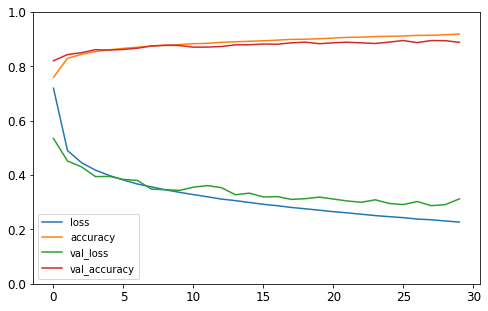

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 524us/step - loss: 0.3430 - accuracy: 0.8805


[0.343028724193573, 0.8805000185966492]

In [31]:
X_new = X_test[:15]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.32, 0.  , 0.04, 0.  , 0.01, 0.  , 0.63, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.02, 0.02, 0.  ],
       [0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.

In [33]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])